___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

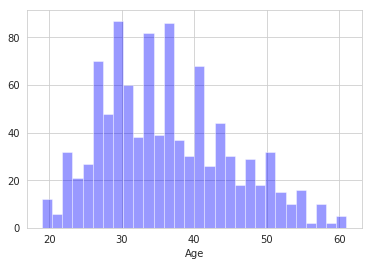

In [15]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'].dropna(),kde=False, color='blue',bins=30)

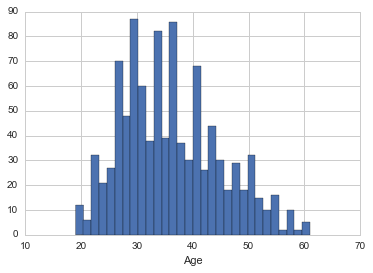

**Create a jointplot showing Area Income versus Age.**

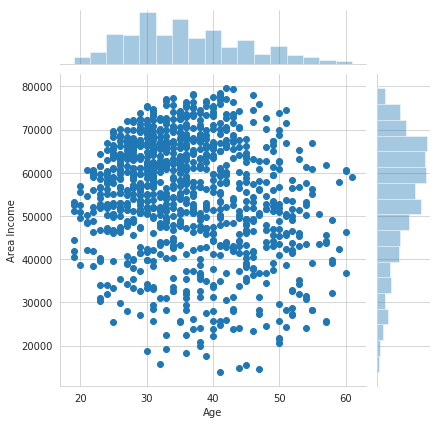

In [25]:
sns.jointplot(x='Age',y='Area Income',data=ad_data,dropna=True,marker='o')

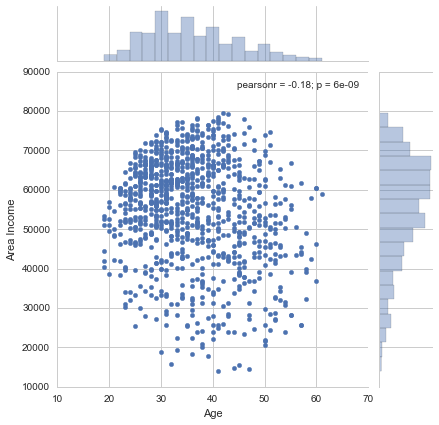

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

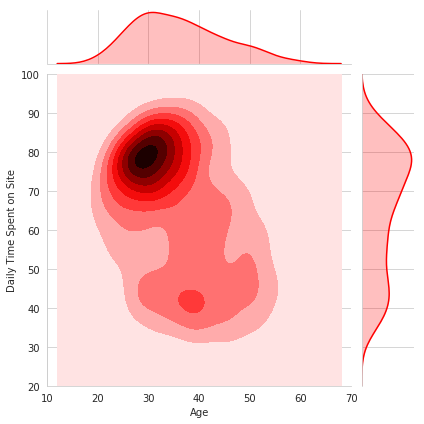

In [37]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data, kind='kde',color='red',xlim=(10,70),ylim=(20,100))

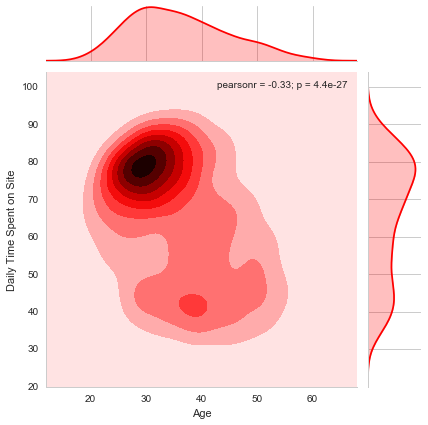

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

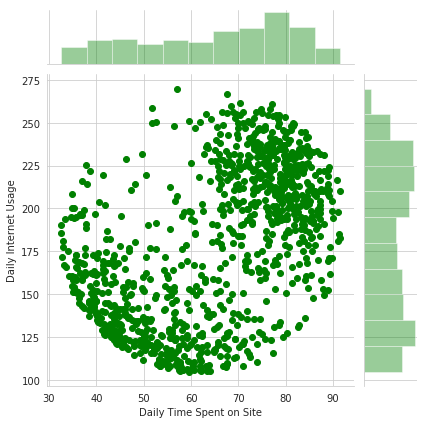

In [38]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,dropna=True,marker='o',color='green')

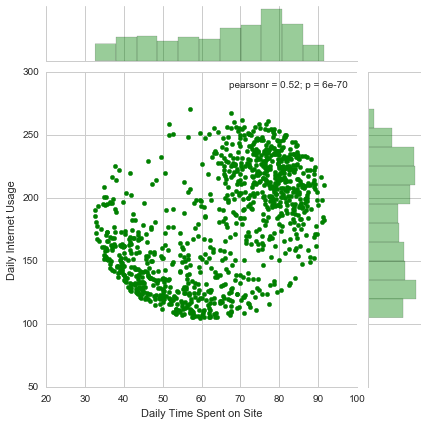

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/hackerman/anaconda2/envs/py36-test/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


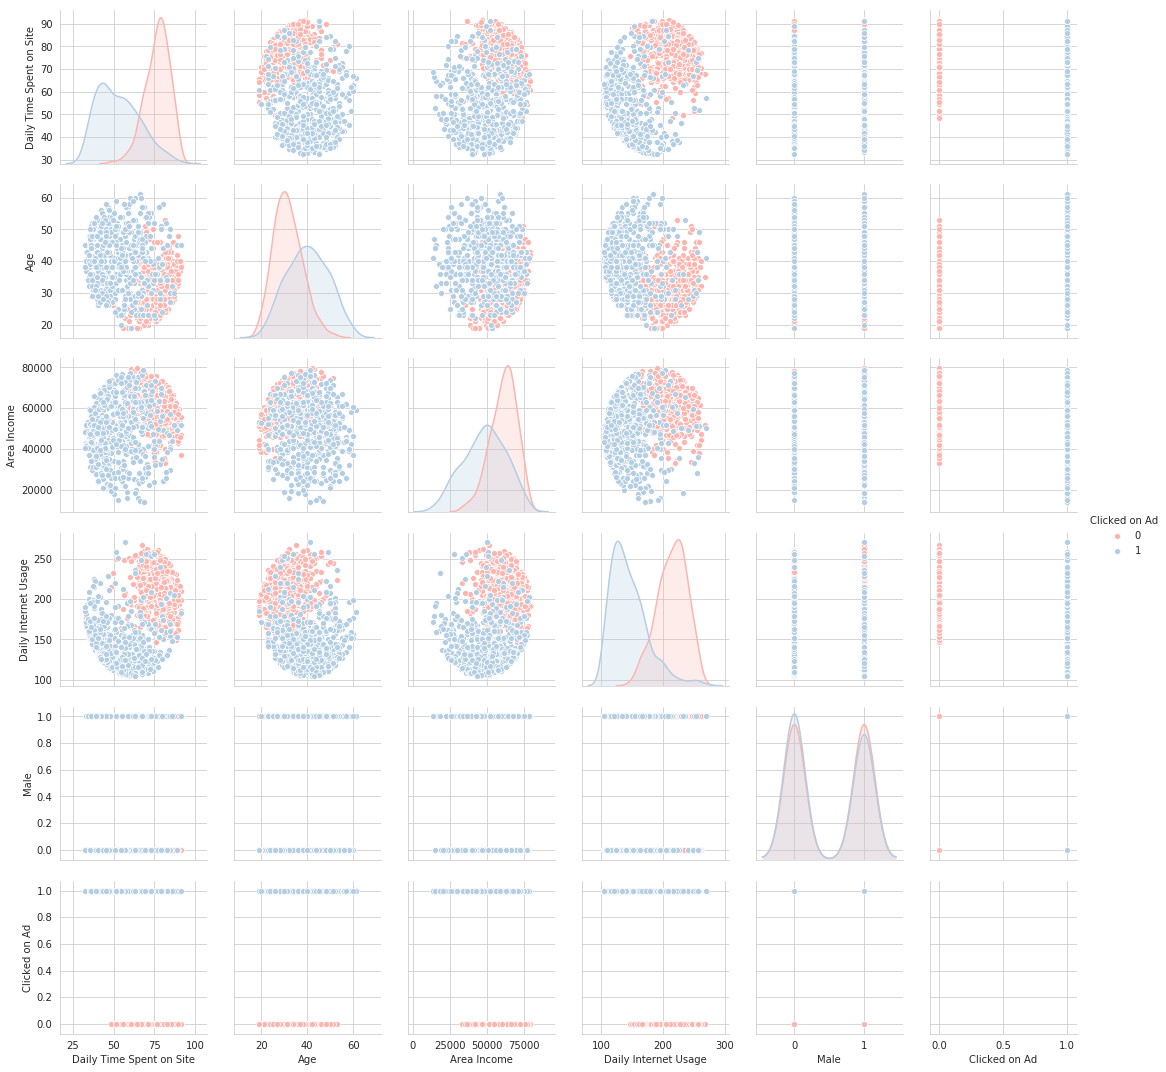

In [46]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='Pastel1')

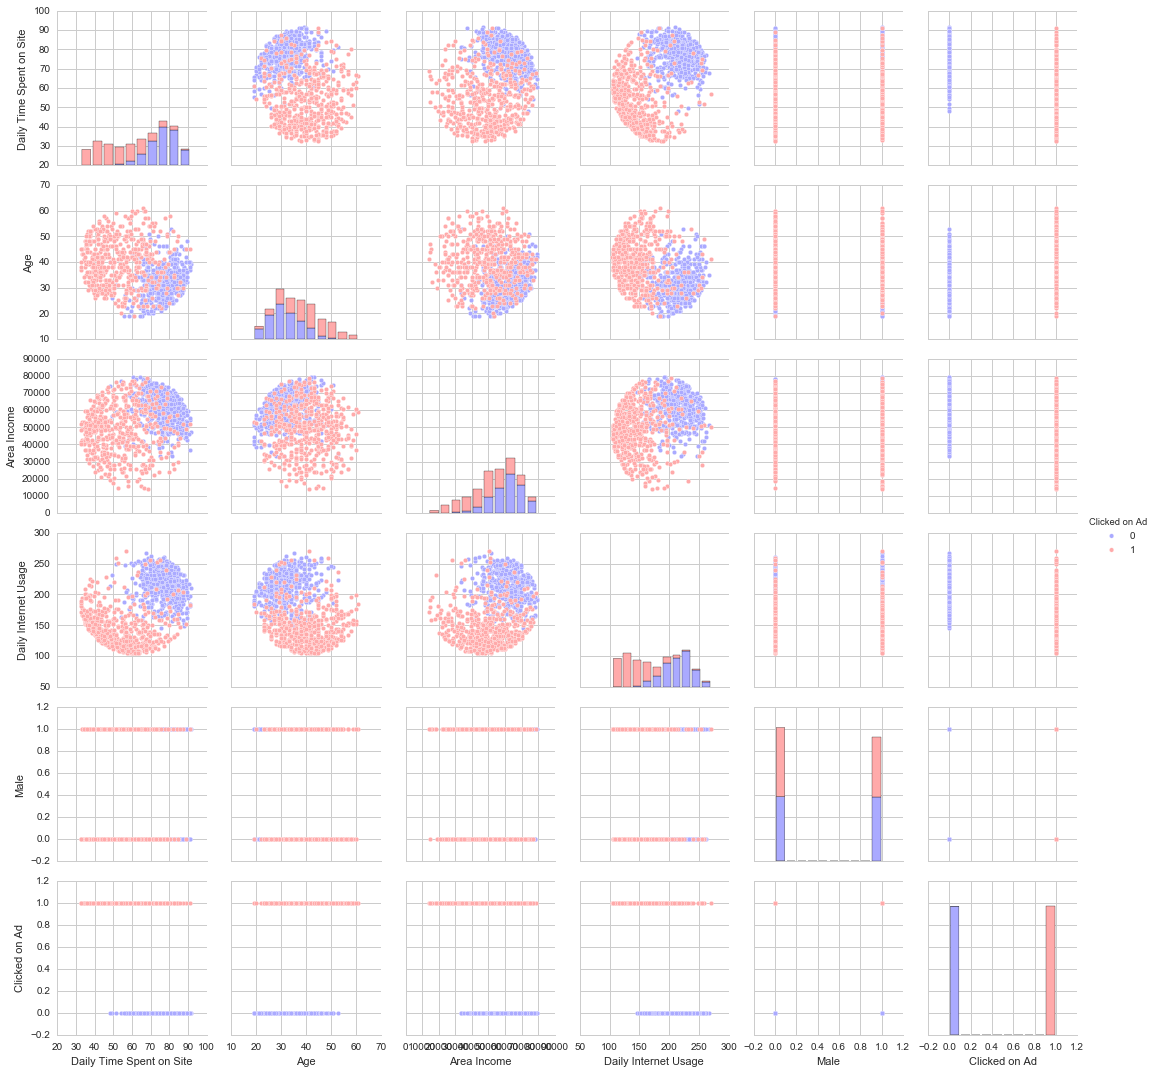

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

### 1. I will convert City, Country into numerical values (one hot encoding)
### 2. I will split the timestamp column into year,month,day and hour (from str to datetime object)

** Split the data into training set and testing set using train_test_split**

In [59]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Converting cities and country to numerical values (one hot encoding)

In [54]:
# Countries
ad_data.Country.astype('category').cat.codes

0      215
1      147
2      184
3      103
4       96
5      158
6      145
7       12
8       82
9       78
10     171
11      34
12      60
13      26
14      18
15     197
16     161
17       0
18      29
19     174
20      36
21      36
22      34
23     111
24     212
25     139
26     219
27      80
28      30
29      27
      ... 
970     94
971    160
972    126
973    227
974     53
975    136
976    154
977     70
978    105
979    156
980     32
981    228
982    136
983     31
984     70
985    234
986    157
987    168
988     16
989    181
990    213
991     46
992    141
993    101
994    135
995    116
996     26
997    140
998     85
999     28
Length: 1000, dtype: int16

In [63]:
#ad_data.Country.value_counts()
ad_data['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [64]:
ad_data['Country code'] = ad_data.Country.astype('category').cat.codes

In [68]:
# For example, country code 10 corresponds to Armenia
ad_data[ad_data['Country code'] ==10].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code
728,89.66,34,52802.58,171.23,Advanced didactic conglomeration,Nicholasport,1,Armenia,2016-02-03 15:15:42,0,10
868,67.71,25,63430.33,225.76,Synergized intangible open system,Daviesborough,1,Armenia,2016-04-28 02:55:10,0,10
876,67.39,44,51257.26,107.19,Realigned intermediate application,Josephberg,0,Armenia,2016-01-24 13:41:38,1,10


In [69]:
# Cities
ad_data.City.astype('category').cat.codes

0      961
1      903
2      111
3      939
4      805
5      282
6       46
7      671
8      884
9      712
10     878
11     180
12     907
13     606
14     944
15     541
16     892
17     707
18     298
19     468
20     666
21     404
22     799
23     617
24     242
25     653
26     901
27     779
28     616
29     898
      ... 
970    410
971    832
972    123
973     94
974    694
975    813
976    677
977    739
978     29
979    492
980    567
981    936
982    397
983    412
984    423
985    759
986    679
987    459
988    758
989    787
990    580
991    444
992    520
993    191
994    547
995    126
996    488
997    798
998    935
999    744
Length: 1000, dtype: int16

In [71]:
#ad_data.City.value_counts()
ad_data['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [72]:
ad_data['City code'] = ad_data.City.astype('category').cat.codes

In [73]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805


In [75]:
# For example, city code 111 corresponds to Davidton
ad_data[ad_data['City code'] == 111].head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
2,69.47,26,59785.94,236.5,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111


In [76]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805


#### Converting timestamp column to DateTime object and splitting column into month,day,hour ...

In [58]:
type(ad_data.Timestamp[0])

str

In [79]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805


In [86]:
ad_data['Hour'] = ad_data.apply(lambda x: x['Timestamp'].hour, axis=1) #using DateTime objects
ad_data['Month'] = ad_data.apply(lambda x: x['Timestamp'].month, axis=1) 
ad_data['Day'] = ad_data.apply(lambda x: x['Timestamp'].day, axis=1) 

#ad_data.apply(lambda x: x['Timestamp'].day, axis=1)

In [87]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code,Hour,Month,Day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961,0,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903,1,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111,20,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939,2,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805,3,6,3


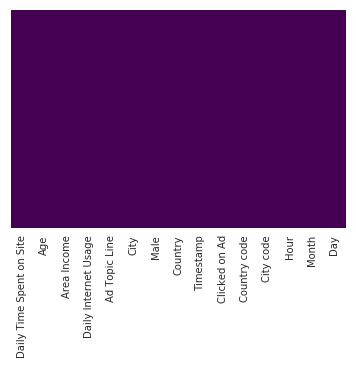

In [88]:
# Checking heat map to detect null values
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [90]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country code,City code,Hour,Month,Day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961,0,3,27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,147,903,1,4,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,184,111,20,3,13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,103,939,2,1,10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,96,805,3,6,3


In [91]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Country code', 'City code', 'Hour',
       'Month', 'Day'],
      dtype='object')

In [92]:
# Drop Columns: Ad Topic column (don't know how to get info from there), and others
# I'm creating another set without these columns

ad_data_cleaned = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male','Country code','City code','Hour','Month','Day', 'Clicked on Ad']]
#ad_data.drop(['Ad Topic Line','City','Country',],axis=1,inplace=True)

In [93]:
ad_data_cleaned.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country code,City code,Hour,Month,Day,Clicked on Ad
0,68.95,35,61833.90,256.09,0,215,961,0,3,27,0
1,80.23,31,68441.85,193.77,1,147,903,1,4,4,0
2,69.47,26,59785.94,236.50,0,184,111,20,3,13,0
3,74.15,29,54806.18,245.89,1,103,939,2,1,10,0
4,68.37,35,73889.99,225.58,0,96,805,3,6,3,0


#### Split train and test data

In [89]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(ad_data_cleaned.drop('Clicked on Ad',axis=1), 
                                                    ad_data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

** Train and fit a logistic regression model on the training set.**

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [97]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_test, predictions) #Good enough

array([[149,   8],
       [ 15, 128]])

## Great Job!